# **AI-Powered Financial Insights: Harnessing LLMs for a Competitive Edge in the Market**

## Getting Started

### What is AI-Powered Financial Insight?

Di era modern ini, data keuangan semakin kompleks dan jumlahnya sangat besar. Untuk memahami data tersebut secara cepat dan akurat, kita bisa menggunakan teknologi **AI-powered financial insight**, yaitu pendekatan analisis data keuangan dengan bantuan kecerdasan buatan, khususnya **Large Language Models (LLMs)**.

Dengan menggunakan AI, kita bisa:

* Mengambil ringkasan laporan keuangan secara otomatis.
* Menjelaskan tren yang terlihat pada grafik keuangan.
* Mendeteksi potensi risiko keuangan hanya dari data mentah.

Tujuan akhirnya adalah membantu kita membuat keputusan yang lebih baik, lebih cepat, dan berdasarkan data yang solid.

### Why Use Large Language Models (LLMs) in Finance?

LLM (Large Language Model) adalah model AI yang dilatih dengan jutaan data teks, sehingga mampu memahami dan menghasilkan teks seperti manusia. Kita mungkin mengenal ChatGPT, Groq, atau Claude sebagai contoh LLM.

Dalam konteks keuangan, LLM sangat bermanfaat karena:

* Dapat membaca dan memahami laporan keuangan berbahasa natural.
* Menjawab pertanyaan tentang kondisi keuangan suatu perusahaan.
* Menginterpretasikan grafik seperti tren revenue atau cash flow.
* Menghasilkan insight keuangan secara otomatis tanpa perlu coding kompleks.

Dengan kata lain, LLM membuat analisis keuangan menjadi lebih **mudah, cepat, dan efisien**, bahkan untuk kita yang tidak punya latar belakang finansial maupun teknis.

### The Workflow: A Roadmap from Raw Data to Interactive Dashboard

Berikut adalah alur kerja (workflow) yang akan kita gunakan sepanjang course ini:

1. **Ambil Data Keuangan**
   Mengambil data dari Sectors API menggunakan Python.

2. **Eksplorasi dan Persiapan Data**
   Data yang kita ambil akan dibersihkan dan disiapkan agar bisa dibaca oleh AI.

3. **Analisis dengan LLM**
   Menggunakan LangChain dan Groq untuk menghasilkan insight secara otomatis.

4. **Visualisasi Data**
   Membuat grafik yang memperlihatkan tren keuangan menggunakan AI.

5. **Bangun Dashboard**
   Membangun dashboard interaktif menggunakan Streamlit dan menampilkan hasil analisis AI secara langsung.

### Tools and Technologies Overview

Untuk menyelesaikan course ini, kita akan menggunakan beberapa tools berikut:

- **Python**: Bahasa pemrograman utama yang akan kita gunakan. Mudah dipahami, fleksibel, dan banyak digunakan dalam analisis data serta AI
- **Jupyter Notebook**: Tempat kita akan menulis dan menjalankan kode Python. Sangat cocok untuk eksperimen data dan dokumentasi proses analisis.
- **Streamlit**: Framework Python untuk membuat aplikasi web secara cepat. Kita akan menggunakannya untuk membangun dashboard dari data dan insight yang kita miliki.
- **LangChain**: Framework yang memudahkan kita menghubungkan LLM dengan data.
- **Groq**: Salah satu penyedia LLM yang sangat cepat dan efisien. Keduanya akan digunakan untuk menghasilkan insight otomatis dari data keuangan.
- **Sectors API**: Sumber data keuangan yang akan kita gunakan. Dengan API ini, kita bisa mengambil data tentang perusahaan, laporan keuangan, dan informasi sektor industri secara real time.

# Getting Financial Data via API

Data keuangan adalah pondasi dari semua insight yang akan kita hasilkan. Di bagian ini, kita akan belajar bagaimana cara mengambil data keuangan secara otomatis menggunakan **API** — semacam jembatan digital yang menghubungkan kita dengan data real-time dari internet.

## 🔌 What is an API and How It Works

**API (Application Programming Interface)** adalah jembatan yang memungkinkan dua aplikasi berkomunikasi. Bayangkan seperti kita memesan makanan lewat aplikasi, dan restoran mengantarkan pesanan ke rumah — konsep yang sama berlaku saat kita minta data ke server melalui API.

🔁 Cara kerjanya:

* Kita kirim **request** (permintaan data)
* Server API membalas dengan **response** (data, biasanya dalam format JSON)

## 🌐 Introduction to the Sectors API

[Sectors API](https://sectors.app/api) adalah layanan yang menyediakan berbagai informasi terkait sektor industri dan keuangan perusahaan. 

Anggap saja ini sebagai perpustakaan atau sumber data utama kita.Kita bisa melihat semua "menu" data yang tersedia di dokumentasi resmi mereka: https://sectors.app/api

* Melihat daftar subsektor industri
* Mengambil daftar perusahaan berdasarkan subsektor
* Mengakses data keuangan mereka
* dll

## 🔑 Step 1: Obtaining Your Personal API Key

Untuk menggunakan Sectors API, kita perlu mendaftar dan mendapatkan **API Key** sebagai tanda pengenal kita.

📝 Langkah-langkah:

1. Kunjungi [sectors.app/api](https://sectors.app/api)
2. Login atau daftar akun
3. Salin API Key Anda

Kita akan menyimpan API Key ini agar bisa digunakan nanti dalam kode Python.

## ⚙️ Step 2: Setting Up Your Python Environment

### Menyimpan API Key dengan Aman

Agar API Key kita aman dan tidak terlihat langsung dalam kode, kita akan menyimpannya dalam file `.env`. Untuk membaca file ini, kita gunakan library `dotenv`.

In [2]:
from dotenv import load_dotenv
import os

Gunakan `load_dotenv()` untuk memuat semua variabel dari file .env kita.

In [3]:
load_dotenv()

True

Sekarang, kita ambil key tersebut dari environment dan simpan dalam variabel. Gunakan `os.getenv("NAMA_VARIABEL")` untuk "ambil nilai dari variabel X"

In [4]:
SECTORS_API_KEY = os.getenv("SECTORS_API_KEY")

### Menyiapkan Akses Cepat

Supaya lebih mudah, kita akan menyimpan alamat utama API dan header otorisasi kita dalam variabel. Jadi, kita tidak perlu mengetiknya berulang kali.

In [5]:
BASE_URL = "https://api.sectors.app/v1"
HEADERS = {"Authorization": SECTORS_API_KEY}

> 💡 `BASE_URL` menyimpan alamat utama API, dan `HEADERS` menyimpan API Key yang akan dikirim saat kita melakukan permintaan ke API.

## 📥 Step 3: Extracting and Loading Financial Data
### 🔍 Subsector

Sebagai contoh awal, kita akan mengambil daftar subsektor industri dari API:


Import library '`requests`' yang berfungsi sebagai "kurir" untuk mengirim permintaan kita

In [6]:
import requests

Kita tentukan alamat lengkap pesanan kita berdasarkan dokumentasi. Gunakan `f"{...}"` untuk mempermudah menggabungkan string di Python.

In [8]:
url_subsectors = f"{BASE_URL}/subsectors/"

Sekarang kita kirim permintaannya!

- Gunakan `requests.get()` -> perintah untuk "Tolong ambilkan data dari URL ini".
- Kita juga menyertakan `HEADERS` agar server tahu siapa kita.

In [9]:
resp = requests.get(url_subsectors, headers=HEADERS)

In [10]:
resp

<Response [200]>

`resp` sekarang berisi jawaban dari server. Untuk melihat isinya dalam format yang bisa dibaca Python, kita gunakan `.json()`.

In [11]:
resp.json()

[{'sector': 'transportation-logistic', 'subsector': 'transportation'},
 {'sector': 'properties-real-estate', 'subsector': 'properties-real-estate'},
 {'sector': 'infrastructures', 'subsector': 'telecommunication'},
 {'sector': 'infrastructures',
  'subsector': 'heavy-constructions-civil-engineering'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'food-beverage'},
 {'sector': 'infrastructures', 'subsector': 'utilities'},
 {'sector': 'healthcare', 'subsector': 'healthcare-equipment-providers'},
 {'sector': 'financials', 'subsector': 'financing-service'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'tobacco'},
 {'sector': 'healthcare', 'subsector': 'pharmaceuticals-health-care-research'},
 {'sector': 'consumer-non-cyclicals',
  'subsector': 'nondurable-household-products'},
 {'sector': 'consumer-cyclicals', 'subsector': 'media-entertainment'},
 {'sector': 'industrials', 'subsector': 'industrial-goods'},
 {'sector': 'consumer-non-cyclicals', 'subsector': 'food-staples-retailin

Lalu ubah menjadi `DataFrame` agar mudah dianalisis:

In [12]:
import pandas as pd

subsectors_df = pd.DataFrame(resp.json())
subsectors_df.head()

,sector,subsector
0,transportation-logistic,transportation
1,properties-real-estate,properties-real-estate
2,infrastructures,telecommunication
3,infrastructures,heavy-constructions-civil-engineering
4,consumer-non-cyclicals,food-beverage


### 🏢 Companies

Selanjutnya, kita akan mengambil daftar perusahaan berdasarkan subsektor. Misalnya kita ingin melihat perusahaan di subsektor **banks**:

Tentukan alamat perusahaan

In [13]:
url_companies = f"{BASE_URL}/companies/"

Kita perlu menambahkan "catatan khusus" pada pesanan kita. Di API, ini disebut '`params`' (parameter).

In [20]:
selected_subsector = "banks"
params = {"sub_sector": selected_subsector}

Kirim pesanan

In [21]:
resp = requests.get(url_companies, headers=HEADERS, params=params)

Ubah menjadi `dataframe`:

In [22]:
companies_df = pd.DataFrame(resp.json())
companies_df.head()

,symbol,company_name,sorted_by
0,AGRO.JK,PT Bank Raya Indonesia Tbk,AGRO.JK
1,AGRS.JK,PT Bank IBK Indonesia Tbk.,AGRS.JK
2,AMAR.JK,PT Bank Amar Indonesia Tbk.,AMAR.JK
3,ARTO.JK,PT Bank Jago Tbk.,ARTO.JK
4,BABP.JK,PT Bank MNC Internasional Tbk.,BABP.JK


# 🧠 AI-Powered Analysis with LLMs

Di module sebelumnya, kita sudah berhasil mengambil data dari API. Sekarang, kita akan masuk ke tahap paling seru: **menggunakan AI (Large Language Model)** untuk membaca dan menginterpretasi data keuangan.

LLM memungkinkan kita untuk:

* Membuat ringkasan otomatis dari data
* Menjawab pertanyaan keuangan
* Mendeteksi pola dan risiko

Semua bisa dilakukan hanya dengan beberapa baris kode — dan tentu saja dengan bantuan **prompt** (instruksi berbentuk teks).

**Introduction to AI-Generated Financial Insights**

AI-generated financial insight adalah hasil analisis data keuangan yang dibuat oleh model AI secara otomatis. Dengan bantuan LLM, kita bisa:

* Menyusun ringkasan laporan keuangan 
* Menjelaskan tren grafik 
* Mengubah data menjadi teks yang mudah dimengerti oleh manusia

Ini sangat membantu, terutama untuk kita yang tidak punya latar belakang finansial — karena AI bisa menjelaskan data dalam bahasa yang lebih sederhana dan intuitif.

## 🤖 Why Use AI for Financial Data Interpretation

Data keuangan seringkali bersifat kompleks. Tanpa bantuan AI, kita perlu waktu lama untuk:

* Membaca angka demi angka dari laporan
* Membuat kesimpulan sendiri
* Menyusun insight yang berguna

Dengan LLM, kita cukup menyiapkan data dan menyusun pertanyaan (prompt), lalu biarkan AI yang mengolahnya. Hasilnya bisa berupa:

* Analisis deskriptif
* Penjelasan tren
* Ringkasan performa perusahaan

📌 Ini membuat pekerjaan analis, mahasiswa, bahkan pebisnis jadi jauh lebih cepat dan efisien.

### 🔗 LangChain

[LangChain](https://python.langchain.com/docs/introduction/) adalah framework Python yang memudahkan kita dalam:

* Menyusun prompt
* Menghubungkan LLM dengan data kita
* Menyusun pipeline otomatis dari input hingga output

LangChain sangat cocok untuk membangun alur kerja berbasis LLM, seperti tanya-jawab keuangan, chatbot, atau ringkasan otomatis.

### ⚡ Groq

[Groq](https://console.groq.com/docs/quickstart) adalah layanan yang menyediakan akses ke model-model LLM super cepat seperti LLaMA 3 dan lainnya. Kita akan menggunakan Groq sebagai penyedia model AI-nya.

## ⚙️ Setting Up LangChain and LLMs

Untuk memulai, kita perlu mengimpor dua komponen penting: 

* `langchain_groq`: digunakan untuk menghubungkan LangChain dengan model LLM dari Groq.
* `PromptTemplate`: digunakan untuk membuat format pertanyaan atau instruksi yang ingin kita berikan ke AI.

In [23]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate

### 🧪 Inisialisasi Model LLM

Sebelum bisa menggunakan LLM, kita perlu menginisiasi model-nya terlebih dahulu. Ini seperti menyalakan mesin sebelum digunakan.

Kita butuh 3 parameter utama:
* `groq_api_key`: API Key dari Groq yang kita simpan di file `.env`. Digunakan untuk otorisasi.
* `model_name`: nama model yang ingin kita gunakan. Di sini kita pakai `"llama3-70b-8192"`, yaitu model besar dan canggih dari Meta yang disediakan Groq. Dokumentasi lengkap model Groq bisa dilihat di: [https://console.groq.com/docs](https://console.groq.com/docs)
* `temperature`: mengatur tingkat kreativitas jawaban.

  * Semakin **rendah** (misalnya 0.0) → jawaban lebih konsisten dan deterministik.
  * Semakin **tinggi** (misalnya 1.0) → jawaban lebih kreatif dan bervariasi.

📌 Kita menggunakan `0.7` agar hasilnya tetap kreatif namun tidak terlalu liar.


In [25]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    temperature=0.7,
    model_name="llama3-70b-8192",
    groq_api_key=GROQ_API_KEY 
)

## 🧱 Building a Prompt-Driven Analysis Pipeline

Untuk memahami bagaimana LLM bekerja, mari kita mulai dari contoh **sederhana** di luar konteks keuangan terlebih dahulu.

Kita akan menyusun **prompt** (instruksi), lalu melihat bagaimana LLM merespons.

LangChain menyediakan fungsi `.invoke()` yang digunakan untuk menjalankan model:

In [26]:
# Contoh pemanggilan langsung
response = llm.invoke("Jelaskan apa itu API dalam satu kalimat singkat.")
print(response.content)

API (Application Programming Interface) adalah sebuah sistem yang memungkinkan berbagai aplikasi berkomunikasi dan berbagi data dengan aplikasi lainnya melalui sebuah set instruksi atau protokol yang telah ditentukan.


> 📌 `invoke()` adalah cara cepat untuk meminta jawaban dari LLM berdasarkan prompt (teks perintah) yang kita kirim.

### 📄 Menggunakan Prompt Template

Kalau kita ingin AI melakukan tugas spesifik berdasarkan pola tertentu, kita bisa membuat *template prompt*.

Sebagai contoh, kita akan membuat template yang meminta AI untuk menjelaskan sebuah konsep kepada anak berusia 10 tahun.

**1. Buat Template Prompt**

Gunakan `PromptTemplate` untuk membuat format prompt dengan variabel dinamis. Perhatikan `{topic}`, ini adalah variabel yang bisa kita isi nanti.

In [32]:
template = PromptTemplate(
    input_variables=["topic"],
    template="Jelaskan konsep '{topic}' seolah-olah saya adalah anak berusia 10 tahun dalam satu kalimat."
)

**2. Mengisi Variabel**

Isi variabel dinamis yang sudah kita definisikan sebelumnya menggunakan `.format`


In [33]:
prompt = template.format(topic="Laporan Keuangan Tahunan")

**3. Jalankan LLM**

Untuk menjalankan LLM dengan prompt hasil template, kita menggunakan `.invoke()`

In [34]:
response = llm.invoke(prompt)
response.content

'"Laporan Keuangan Tahunan" adalah seperti buku catatan yang dibuat oleh perusahaan untuk mencatat semua uang yang mereka dapat dan habiskan dalam satu tahun, seperti kita mencatat uang jajan dan uang saku kita dalam buku catatan, tapi lebih besar dan kompleks!'

Kini kita punya pemahaman dasar tentang cara memberi instruksi terstruktur kepada AI. Di modul berikutnya, kita akan mengganti `topic` sederhana ini dengan data keuangan sungguhan untuk menghasilkan analisis yang sebenarnya.

Selanjutnya, kita akan menggabungkan **data keuangan dari API** dengan **analisis AI berbasis prompt** dalam konteks nyata.

## 🔹 Analysis

### 1. 💼 Ringkasan Perusahaan (Overview)

In [3]:
symbol = "BBCA.JK"
url_report = f"{BASE_URL}/company/report/{symbol}/?sections=overview"

In [4]:
response_report = requests.get(url_report, headers=HEADERS)
report_data = response_report.json()

In [5]:
# Ekstraksi informasi penting
company_name = report_data["company_name"]
sector = report_data["overview"]["sector"]
sub_sector = report_data["overview"]["sub_sector"]
industry = report_data["overview"]["industry"]
listing_board = report_data["overview"]["listing_board"]
listing_date = report_data["overview"]["listing_date"]
market_cap = report_data["overview"]["market_cap"]
market_cap_rank = report_data["overview"]["market_cap_rank"]
close_price = report_data["overview"]["last_close_price"]
close_date = report_data["overview"]["latest_close_date"]
daily_change = report_data["overview"]["daily_close_change"]
employee_num = report_data["overview"].get("employee_num")
website = report_data["overview"]["website"]
email = report_data["overview"]["email"]

# All-time high/low
all_time_high = report_data["overview"]["all_time_price"]["all_time_high"]
all_time_low = report_data["overview"]["all_time_price"]["all_time_low"]
high_price = all_time_high["price"]
high_date = all_time_high["date"]
low_price = all_time_low["price"]
low_date = all_time_low["date"]

In [6]:
from IPython.display import Markdown

Markdown(f"""
### 💼 Ringkasan Perusahaan: {company_name} ({symbol})

- **Sektor/Subsektor**: {sector} / {sub_sector}
- **Industri**: {industry}
- **Board**: {listing_board}
- **Tanggal Listing**: {listing_date}
- **Jumlah Karyawan**: {int(employee_num):,} orang
- **Kapitalisasi Pasar**: Rp {market_cap:,.0f}
- **Peringkat Kapitalisasi Pasar**: #{market_cap_rank}
- **Harga Terakhir ({close_date})**: Rp {close_price:,}
- **Perubahan Harian**: {daily_change:.2%}
- **All-Time High**: Rp {high_price:,} (pada {high_date})
- **All-Time Low**: Rp {low_price:,} (pada {low_date})
- **Website**: {website}
- **Email IR**: {email}
""")



### 💼 Ringkasan Perusahaan: PT Bank Central Asia Tbk. (BBCA.JK)

- **Sektor/Subsektor**: Financials / Banks
- **Industri**: Banks
- **Board**: Main
- **Tanggal Listing**: 2000-05-31
- **Jumlah Karyawan**: 24,685 orang
- **Kapitalisasi Pasar**: Rp 1,041,665,330,511,872
- **Peringkat Kapitalisasi Pasar**: #2
- **Harga Terakhir (2025-07-21)**: Rp 8,450
- **Perubahan Harian**: 0.30%
- **All-Time High**: Rp 10,950 (pada 2024-09-23)
- **All-Time Low**: Rp 175 (pada 2004-06-08)
- **Website**: www.bca.co.id
- **Email IR**: investor_relations@bca.co.id


### 2. 🤖 Financial Summary (AI-generated dengan Groq)

In [ ]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate

# Inisialisasi LLM dengan LangChain Groq
llm = ChatGroq(
    temperature=0.7,
    model_name="llama3-70b-8192",
    groq_api_key=GROQ_API_KEY 
)

#### Ambil Laporan Keuangan Salah Satu Perusahaan

In [8]:
symbol = "BBCA.JK"
url_fin = f"{BASE_URL}/financials/quarterly/{symbol}/"
params = {
    "report_date": "2025-06-30",
    "approx": "true",
    "n_quarters": "4"
}

response = requests.get(url_fin, headers=HEADERS, params=params)
financials = pd.DataFrame(response.json())

In [9]:
financials

,symbol,financials_sector_metrics,date,premium_income,premium_expense,net_premium_income,non_interest_income,revenue,operating_expense,provision,...,cash_and_short_term_investments,non_loan_assets,total_current_asset,total_non_current_liabilities,financing_cash_flow,operating_cash_flow,investing_cash_flow,net_cash_flow,free_cash_flow,realized_capital_goods_investment
0,BBCA.JK,"{'interest_income': 24366718000000, 'interest_...",2025-03-31,None,None,None,7.005767e+12,34620643000000,9.637633e+12,-1.031032e+12,...,None,None,None,None,-2.180000e+09,35183351000000,-4.300805e+12,3.088037e+13,NaN,None
1,BBCA.JK,"{'interest_income': 24508454000000, 'interest_...",2024-12-31,None,None,None,6.438343e+12,34123858000000,1.073078e+13,3.326360e+11,...,None,None,None,None,-4.754295e+12,-20362764000000,9.151282e+12,-1.596578e+13,NaN,None
2,BBCA.JK,"{'interest_income': 24210090000000, 'interest_...",2024-09-30,None,None,None,6.826009e+12,34208761000000,9.278376e+12,-9.613730e+11,...,None,None,None,None,1.050000e+08,27345976000000,-3.842810e+13,-1.108202e+13,2.579341e+13,None
3,BBCA.JK,"{'interest_income': None, 'interest_expense': ...",2024-06-30,None,None,None,NaN,26832797000000,NaN,NaN,...,None,None,None,None,NaN,16915407000000,NaN,NaN,1.653835e+13,None


In [10]:
prompt_template = PromptTemplate.from_template("""
Berikut adalah laporan keuangan kuartalan sebuah perusahaan (dalam miliar rupiah):

{data}

Tuliskan ringkasan keuangan dalam 3 kalimat, seolah-olah Anda menjelaskan kepada investor.
""")

In [11]:
prompt = prompt_template.format(data=financials)


In [12]:
# Generate ringkasan dari LLM
ringkasan_llm = llm.invoke(prompt)
print("🧠 Ringkasan Keuangan oleh LLM:")
print(ringkasan_llm.content)


🧠 Ringkasan Keuangan oleh LLM:
Berikut adalah ringkasan keuangan BBCA.JK dalam 3 kalimat:

Pada kuartal terakhir, perusahaan kami mencatat pendapatan sebesar Rp 34,62 triliun, dengan biaya operasional sebesar Rp 10,73 triliun dan penyisihan sebesar Rp 3,33 triliun. Arus kas operasional kami mencapai Rp 35,18 triliun, dengan arus kas investasi sebesar Rp -4,30 triliun dan arus kas pendanaan sebesar Rp -2,18 triliun. Secara keseluruhan, perusahaan kami menunjukkan kinerja keuangan yang stabil dan seimbang, dengan posisi kas yang kuat dan kemampuan untuk menghasilkan arus kas yang positif.


```
content='Berikut adalah ringkasan keuangan perusahaan:\n\nPerusahaan kami telah mencatat pendapatan sebesar ...'
additional_kwargs={}
response_metadata={...}
id='run--...'
usage_metadata={...}
```


- `content`: ✅ Ini isi teks (yang kamu butuhkan)
- `response_metadata`, `usage_metadata`: berguna untuk logging dan analitik
- `id`: ID sesi/panggilan LLM

### 3. 📈 AI-Based Trend Visualization

In [68]:
template_viz = """
Berikut ini adalah data ringkasan finansial perusahaan (dalam format tabel):

{data}

Buatlah kode Python untuk menampilkan line plot dengan:
- Sumbu x = kolom 'date'
- Sumbu y = kolom 'revenue'
- Gunakan matplotlib
- Judul grafik: "Trend Revenue Perusahaan"
- Ukuran gambar diperbesar agar jelas
Jangan tampilkan penjelasan, hanya berikan kodenya saja.
"""

In [76]:
sample_data_viz = financials[['date', 'revenue']].dropna().to_string(index=False)

In [77]:
llm_viz = llm.invoke(template_viz.format(data=sample_data_viz))
print(llm_viz.content)

```
import matplotlib.pyplot as plt
import pandas as pd

data = {'date': ['2025-03-31', '2024-12-31', '2024-09-30', '2024-06-30'], 
        'revenue': [34620643000000, 34123858000000, 34208761000000, 26832797000000]}
df = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['revenue'])
plt.title("Trend Revenue Perusahaan")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()
```


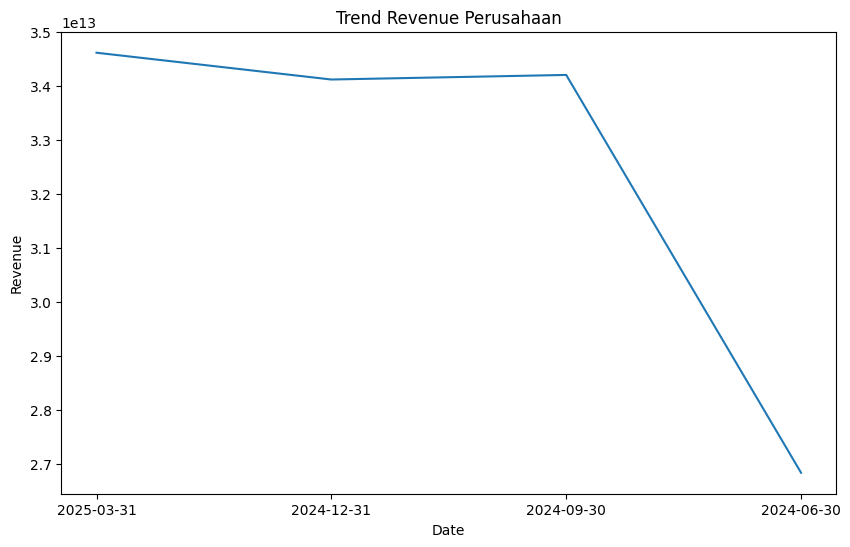

In [78]:
clean_code = llm_viz.content.strip().strip("```").replace("python", "").strip()
exec(clean_code)

### 4. 🔎 AI-Based Trend Interpreter

In [14]:
prompt_tren = f"""
Berikut adalah data tren keuangan kuartalan perusahaan (dalam miliar rupiah):

{financials}

Analisis tren yang muncul dari data tersebut. Fokus pada perubahan revenue, net income, dan operating cashflow.
Buat ringkasan dalam betuk 2-3 poin.
"""

In [15]:
interpretasi_tren = llm.invoke(prompt_tren)
print("🔎 Interpretasi Tren oleh LLM:")
print(interpretasi_tren.content)

🔎 Interpretasi Tren oleh LLM:
Based on the provided financial data, here are 2-3 key points summarizing the trends:

**Revenue Trend:**
The revenue has been relatively stable, with a slight increase from Q2 2024 to Q3 2024, but then a significant decrease in Q1 2025.

**Net Income Trend:**
Since the net income data is not provided, we can look at the operating cash flow as a proxy. The operating cash flow has been volatile, with a significant decrease in Q4 2024, followed by a recovery in Q1 2025.

**Operating Cash Flow Trend:**
The operating cash flow has been fluctuating, but overall, it has been increasing. There was a significant drop in Q4 2024, but it recovered in Q1 2025. The operating cash flow in Q1 2025 is the highest among the four quarters.

Please note that these trends are based on limited data and may not be representative of the company's overall performance.


### 5. ⚠️ Financial Risk Detector

In [16]:
prompt_risiko = f"""
Berikut adalah data keuangan kuartalan:

{financials}

Apa potensi risiko yang perlu diwaspadai dari perusahaan ini? Sebutkan dalam 2-3 poin.
"""

In [17]:
llm_risiko = llm.invoke(prompt_risiko)
print("⚠️ Potensi Risiko:")
print(llm_risiko.content)

⚠️ Potensi Risiko:
Based on the financial data provided, here are 2-3 potential risks that need to be watched out for:

1. **Liquidity Risk**: The company's cash and short-term investments are not reported, which raises concerns about its ability to meet its short-term obligations. Additionally, the operating cash flow has been volatile, with a significant decrease in Q4 2024 compared to Q3 2024. This could indicate that the company may struggle to generate sufficient cash to meet its needs.
2. **Provisioning Risk**: The provision expense has been increasing, which may indicate that the company is expecting a higher likelihood of loan defaults or other losses. This could be a sign of deteriorating asset quality, which could negatively impact the company's financial performance.
3. **Volatility in Revenue and Expenses**: The company's revenue and operating expenses have been volatile, with significant changes from one quarter to another. This could indicate that the company's business i

In [18]:
prompt_risiko_2 = f"""
Berikut adalah data keuangan perusahaan:

{financials.to_csv(index=False)}

Tugas Anda adalah:
- Identifikasi dan jelaskan risiko keuangan perusahaan ini.
- Tulis dengan bahasa yang mudah dimengerti, seperti menjelaskan ke investor awam.
- Sorot setiap risiko utama dengan simbol ❗
- Tulis maksimal 3 poin.
"""


In [19]:
llm_risiko = llm.invoke(prompt_risiko_2)
print("⚠️ Potensi Risiko:")
print(llm_risiko.content)

⚠️ Potensi Risiko:
Here are the identified financial risks of the company and explanations in simple language, suitable for retail investors:

**Risks:**

1. **Liquidity Risk ❗**: The company's ability to meet its short-term financial obligations is at risk due to its high current liabilities (Rp 280.32 trillion) compared to its current assets (Rp 153.37 trillion). This means that the company may struggle to pay its debts on time, which can lead to financial difficulties.
2. **Credit Risk ❗**: The company's net loan portfolio is substantial (Rp 952.64 trillion), and the allowance for loan losses is significant (Rp 33.00 trillion). This indicates that the company may face difficulties in collecting debts from its borrowers, which can negatively impact its financial performance.
3. **Interest Rate Risk ❗**: The company's interest income (Rp 24.37 trillion) is significantly higher than its interest expense (Rp 3.25 trillion). This means that the company is highly dependent on interest inc


# **AI-Powered Financial Insights: Harnessing LLMs for a Competitive Edge in the Market**

## Getting Started

### What is AI-Powered Financial Insight?

### Why Use Large Language Models (LLMs) in Finance?

### Course Objectives and Learning Outcomes

### The Workflow: A Roadmap from Raw Data to Interactive Dashboard

### Tools and Technologies Overview

  - Python
  - Jupyter Notebook
  - Streamlit
  - LangChain & Groq
  - Sectors API

---

# Getting Financial Data via API

## What is an API and How It Works

## Introduction to the Sectors API

## Step 1: Obtaining Your Personal API Key

## Step 2: Setting Up Your Python Environment (Jupyter Notebook)

## Step 3: Making Your First API Request to Fetch Company Data

## Step 4: Extracting and Loading Financial Data into Jupyter Notebook

---

# AI-Powered Analysis with LLMs

## Introduction to AI-Generated Financial Insights

## Why Use AI for Financial Data Interpretation

## Overview of LLM Tools

### LangChain
### Groq

## Setting Up LangChain and LLMs

## Building a Prompt-Driven Analysis Pipeline

---

# Exploring Financial Insights

## Preparing Data for the LLM

### 1. Generating a Dynamic Company Overview

### 2. Creating an Automated Financial Summary

### 3. Visualizing Revenue Trends

### 4. Interpreting Key Financial Trends

### 5. Detecting Potential Financial Risks

---

# Dashboard Implementation with Streamlit

### Introduction to Streamlit

### Setting Up Streamlit App Structure

### Integrating API Data into the Dashboard

### Embedding LLM-Based Insights

### Deploying Financial Insights Dashboard


---





## 💡 Introduction to AI-Generated Financial Insights

AI-generated financial insight adalah hasil analisis data keuangan yang dibuat oleh model AI secara otomatis. Dengan bantuan LLM, kita bisa:

* Menyusun ringkasan laporan keuangan 
* Menjelaskan tren grafik 
* Mengubah data menjadi teks yang mudah dimengerti oleh manusia

Ini sangat membantu, terutama untuk kita yang tidak punya latar belakang finansial — karena AI bisa menjelaskan data dalam bahasa yang lebih sederhana dan intuitif.

---

## 🤖 Why Use AI for Financial Data Interpretation

Data keuangan seringkali bersifat kompleks. Tanpa bantuan AI, kita perlu wktu lama untuk:

* Membaca angka demi angka dari laporan
* Membuat kesimpulan sendiri
* Menyusun insight yang berguna

Dengan LLM, kita cukup menyiapkan data dan menyusun pertanyaan (prompt), lalu biarkan AI yang mengolahnya. Hasilnya bisa berupa:

* Analisis deskriptif
* Penjelasan tren
* Ringkasan performa perusahaan

📌 Ini membuat pekerjaan analis, mahasiswa, bahkan pebisnis jadi jauh lebih cepat dan efisien.

---

## 🧰 Overview of LLM Tools

Untuk bisa menggunakan AI dalam proyek kita, ada dua alat utama yang akan kita gunakan:

### 🔗 LangChain

LangChain adalah framework Python yang memudahkan kita dalam:

* Menyusun prompt
* Menghubungkan LLM dengan data kita
* Menyusun pipeline otomatis dari input hingga output

LangChain sangat cocok untuk membangun alur kerja berbasis LLM, seperti tanya-jawab keuangan, chatbot, atau ringkasan otomatis.

### ⚡ **Groq**

Groq adalah layanan yang menyediakan akses ke model-model LLM super cepat seperti LLaMA 3 dan lainnya. Kita akan menggunakan Groq sebagai penyedia model AI-nya.

---

## ⚙️ Setting Up LangChain and LLMs

Untuk memulai, kita perlu mengimpor dua komponen penting:

```python
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
```

Penjelasan:

* `langchain_groq`: digunakan untuk menghubungkan LangChain dengan model LLM dari Groq.
* `PromptTemplate`: digunakan untuk membuat format pertanyaan atau instruksi yang ingin kita berikan ke AI.

---

### 🧪 Inisialisasi Model LLM

Sebelum bisa menggunakan LLM, kita perlu menginisiasi model-nya terlebih dahulu. Ini seperti menyalakan mesin sebelum digunakan.

Kita butuh 3 parameter utama:

```python
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    temperature=0.7,
    model_name="llama3-70b-8192",
    groq_api_key=GROQ_API_KEY 
)
```

Penjelasan parameter:

* `groq_api_key`: API Key dari Groq yang kita simpan di file `.env`. Digunakan untuk otorisasi.
* `model_name`: nama model yang ingin kita gunakan. Di sini kita pakai `"llama3-70b-8192"`, yaitu model besar dan canggih dari Meta yang disediakan Groq. Dokumentasi lengkap model Groq bisa dilihat di: [https://console.groq.com/docs](https://console.groq.com/docs)
* `temperature`: mengatur tingkat kreativitas jawaban.

  * Semakin **rendah** (misalnya 0.0) → jawaban lebih konsisten dan deterministik.
  * Semakin **tinggi** (misalnya 1.0) → jawaban lebih kreatif dan bervariasi.

📌 Kita menggunakan `0.7` agar hasilnya tetap kreatif namun tidak terlalu liar.

---

## 🧱 Building a Prompt-Driven Analysis Pipeline

Untuk memahami bagaimana LLM bekerja, mari kita mulai dari contoh **sederhana** di luar konteks keuangan terlebih dahulu.

Kita akan menyusun **prompt** (instruksi), lalu melihat bagaimana LLM merespons.

LangChain menyediakan fungsi `.invoke()` yang digunakan untuk menjalankan model:

```python
response = llm.invoke("What are the top 3 largest animals?")
print(response)
```

📌 `invoke()` adalah cara cepat untuk meminta jawaban dari LLM berdasarkan prompt (teks perintah) yang kita kirim.

---

### 📄 Menggunakan Prompt Template

Kalau kita ingin AI melakukan tugas spesifik berdasarkan pola tertentu, kita bisa membuat *template prompt*. Contoh:

```python
template = PromptTemplate(
    input_variables=["company"],
    template="Summarize the financial performance of {company} in simple terms."
)

prompt = template.format(company="Tesla")
response = llm.invoke(prompt)
print(response)
```

Penjelasan:

* `PromptTemplate`: membuat format prompt dengan variabel dinamis.
* `.format(company="Tesla")`: mengisi bagian `{company}` dengan nama perusahaan.
* `.invoke(prompt)`: menjalankan LLM dengan prompt hasil template.

📌 Teknik ini akan sangat berguna saat nanti kita menganalisis banyak perusahaan secara otomatis.

---

✅ **Kesimpulan Module 3**:

* Kita sudah mengenal tools AI: LangChain & Groq ⚙️
* Belajar inisialisasi model LLM dan menggunakan prompt dasar 💬
* Menjalankan LLM menggunakan `.invoke()` 🚀
* Menggunakan `PromptTemplate` untuk membuat prompt dinamis 📄

Selanjutnya, kita akan menggabungkan **data keuangan dari API** dengan **analisis AI berbasis prompt** dalam konteks nyata.

Siap lanjut ke **Module 4: Exploring Financial Insights**? 💼📊
